In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1. Exploratory Data Analysis
Checklist de base


Analyse de forme:
-variable target : sars-cov-2
-(rows, columns) : (5644, 111)
-variable types  : 70 floats, 37 objects, 4 ints
-missing values  : so many NaN (50% of variables have more than 90% NaN), 2 groups of data : 76% NaN and 89% NaN


Analyse de fond:
-target visualisation: 10% positive, 90% negative

-Variable Signification:
    *standadized variables, skewed(non-symmetric), blood tests
    *age quantile : hard to interpret, maybe data already preprocessed, we    have to assume our own interpretation
    *quantitative variable : binary, viral, several positives for Rhinovirus

-Variable/target relation:
    blood/target : monocytes, platelets, leukocytes seem to correlate with +
    age/target   : young people less + cases, yet we can't conclude anything     since we don't know much about this variable, it may still be useful         though
    viral/target : rare double virus, Rhinovirus/Enterovirus + and covid -??, needs to be more looked into
    
    
Analyse détaillée
-Variable/variable relations:
    *blood/blood : several variables are highly correlated(>0.9)
    *blood/age : very weak correlations
    *viral/viral : influenza rapid tests have bad results
    *illness/blood : sanguin tests between illness and covid different
    *hospitalisation/illness : 
    hospitalisation/blood : so interesting, may help predict to which service one should go
    
-NaN analysis : viral : 1350(92/8), blood : 600(87/12, both : 99


Hypothesis H0
-positive cases correlate with higher leukocytes, monocytes, platelets
    *H0 = mean rates are equal for + and - cases : FALSE
-negative cases correlate with some sicknesses




In [2]:
pd.set_option('display.max_row', 111)
pd.set_option('display.max_column', 111)

data = pd.read_excel('covid-19.xlsx')
df = data.copy()

<AxesSubplot:>

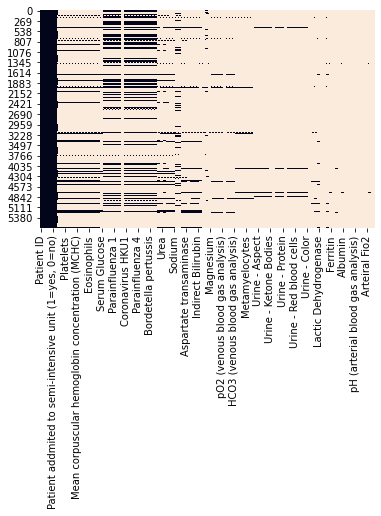

In [3]:
sns.heatmap(df.isna(), cbar = False)

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

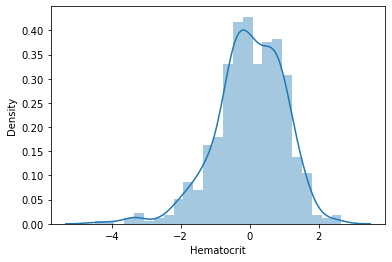

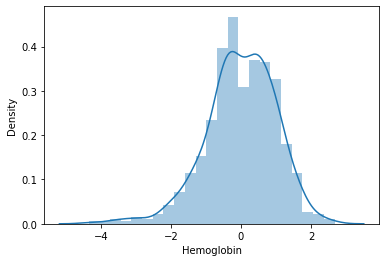

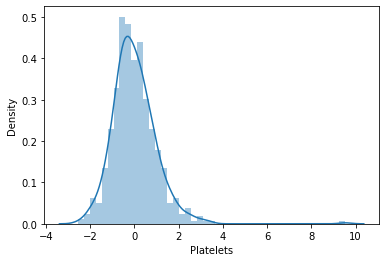

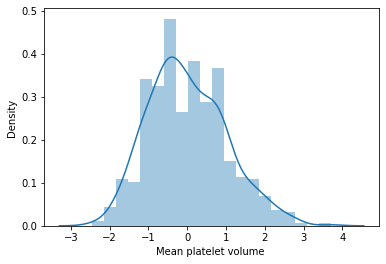

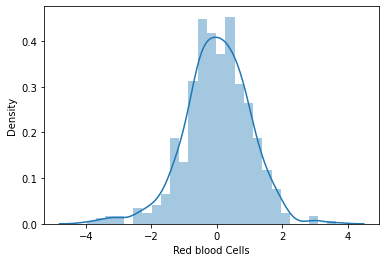

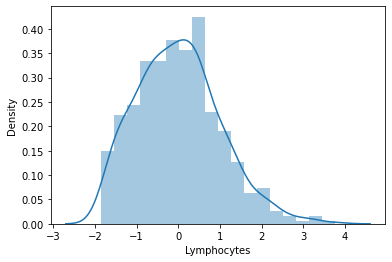

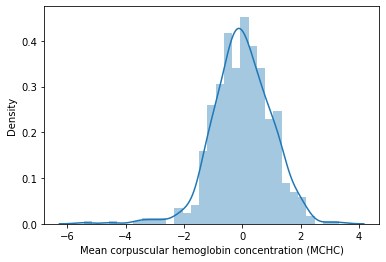

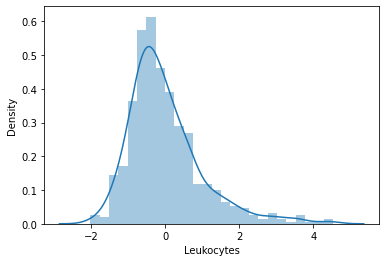

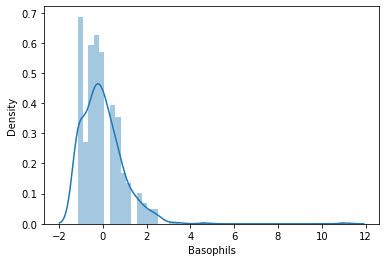

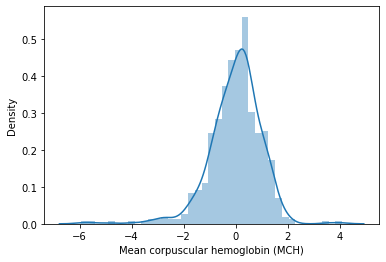

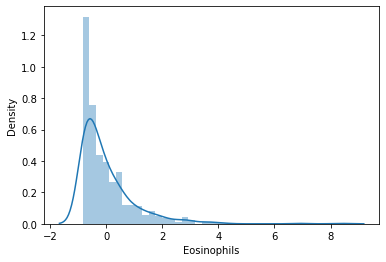

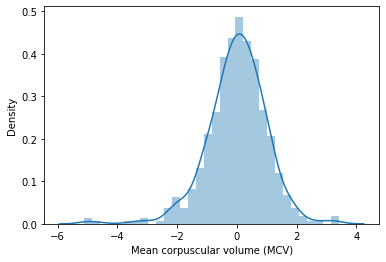

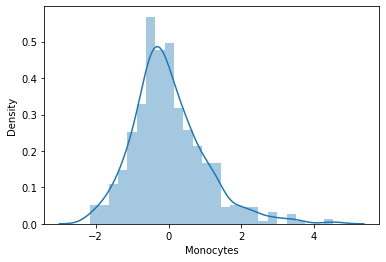

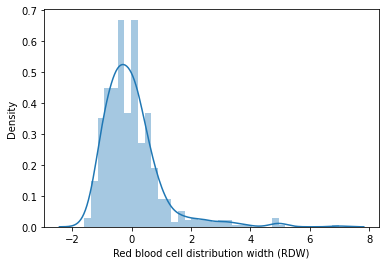

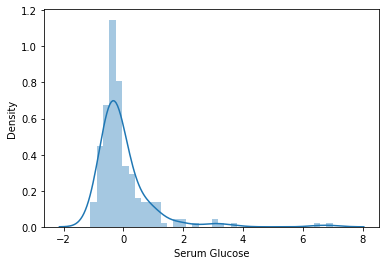

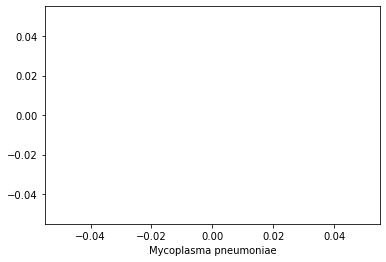

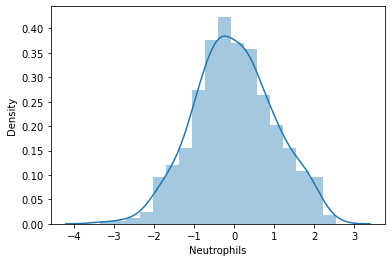

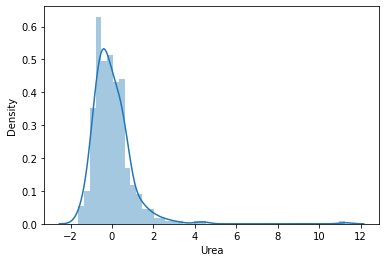

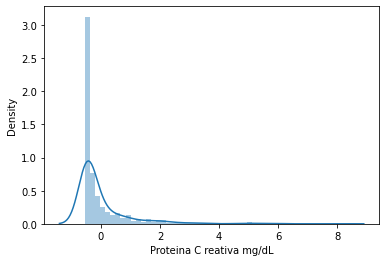

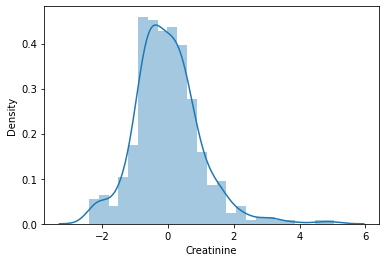

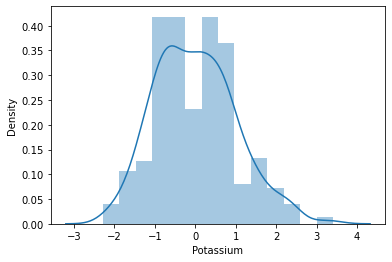

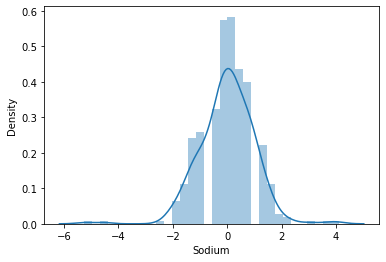

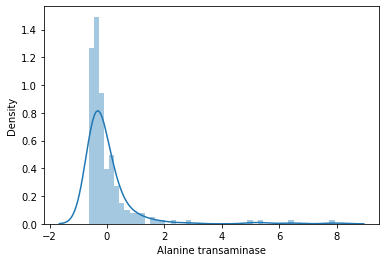

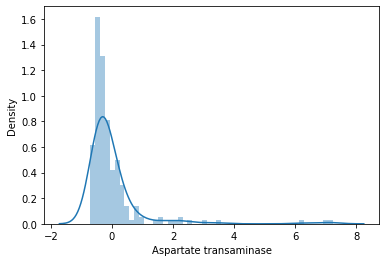

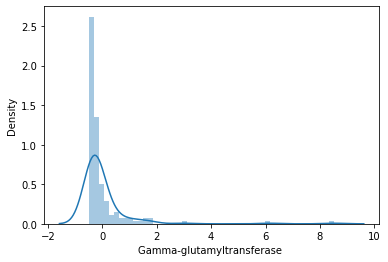

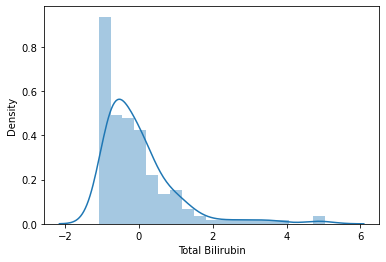

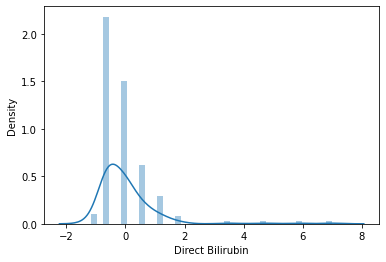

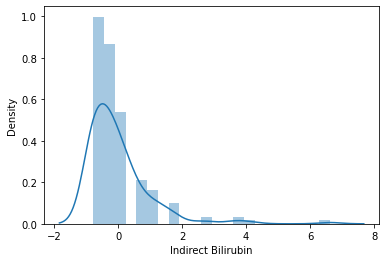

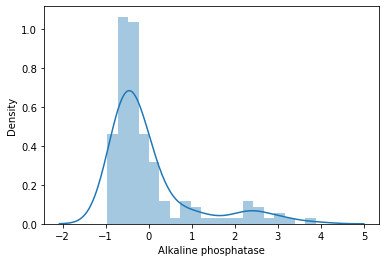

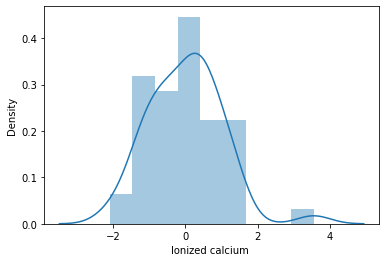

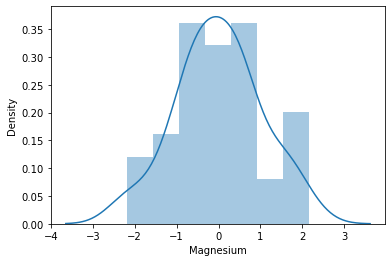

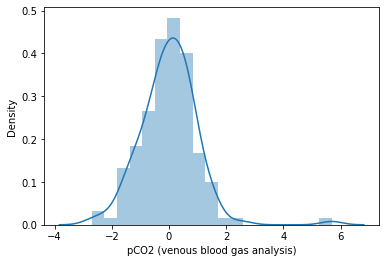

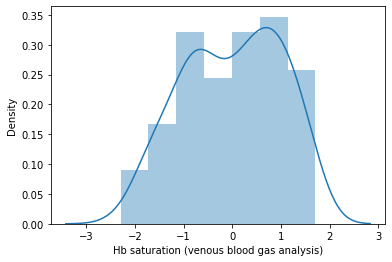

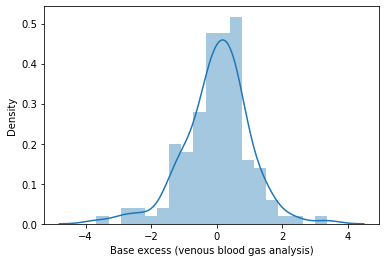

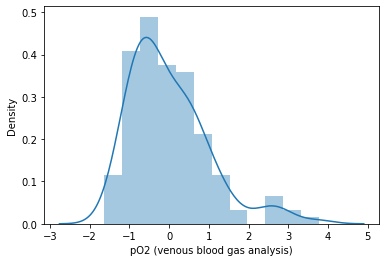

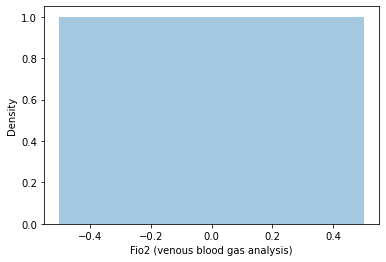

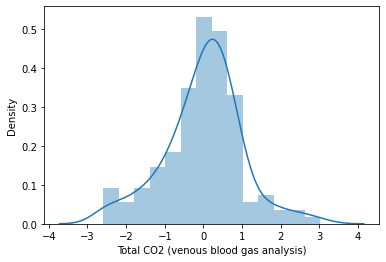

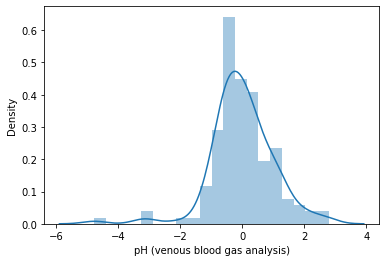

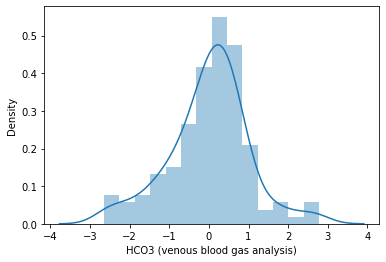

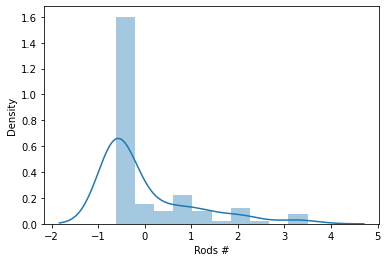

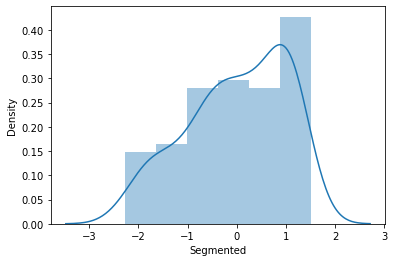

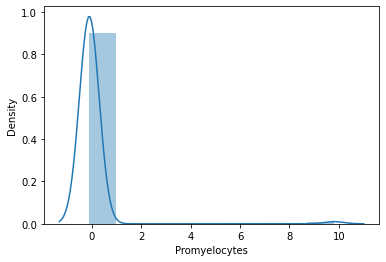

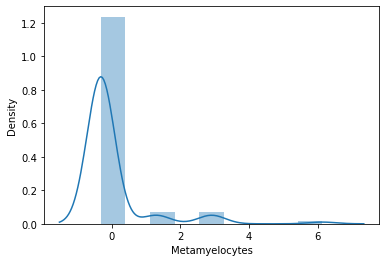

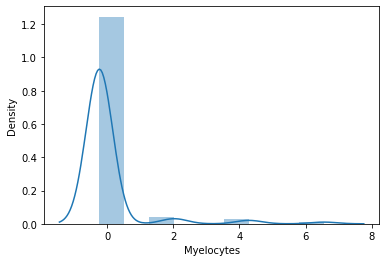

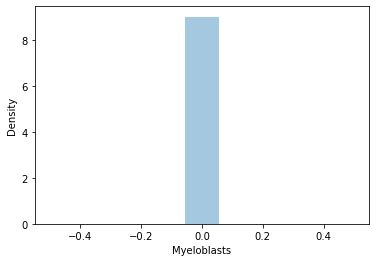

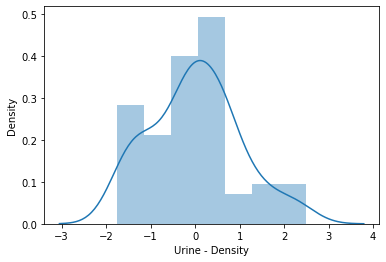

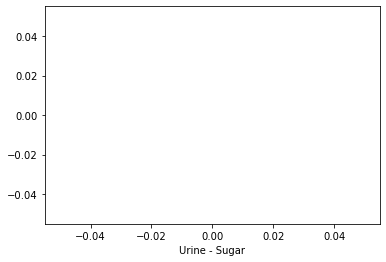

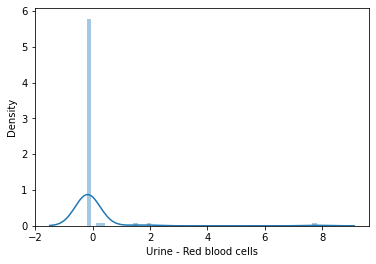

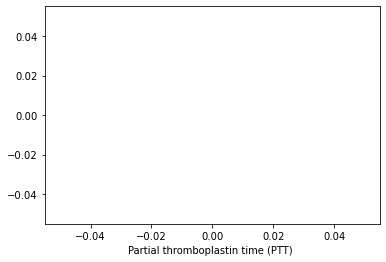

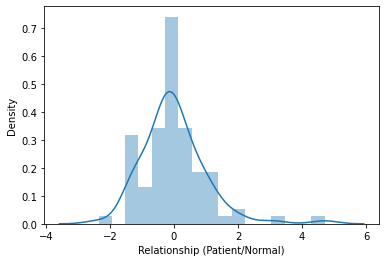

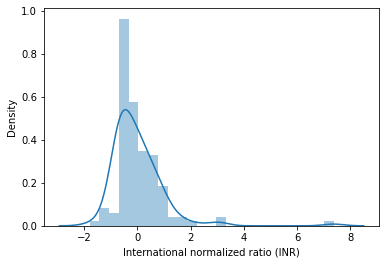

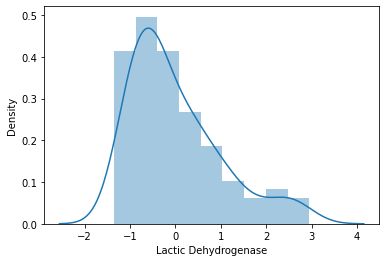

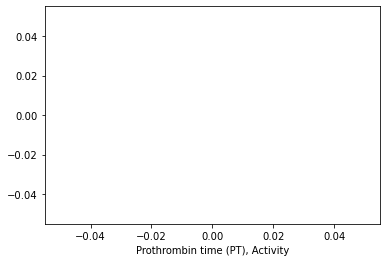

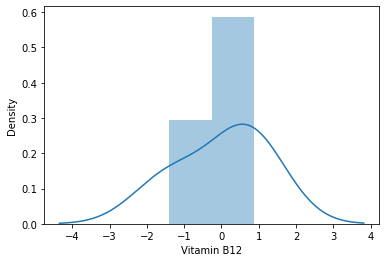

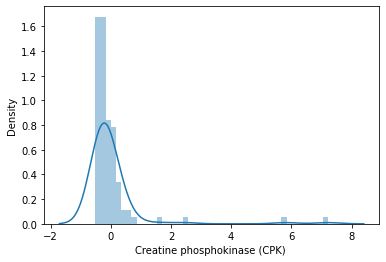

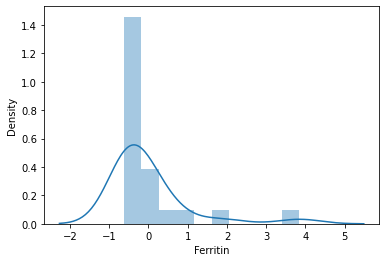

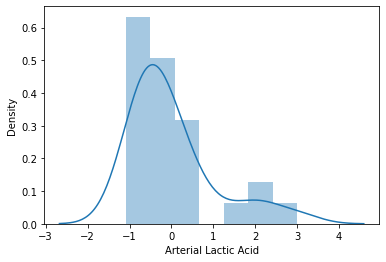

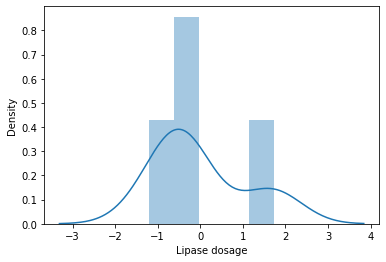

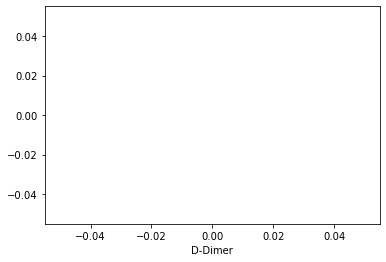

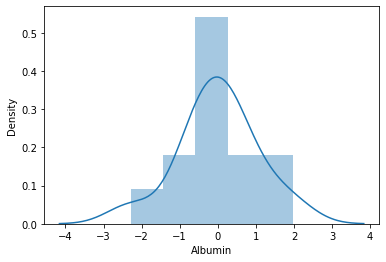

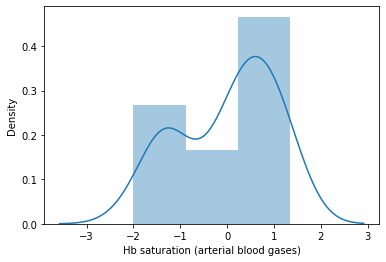

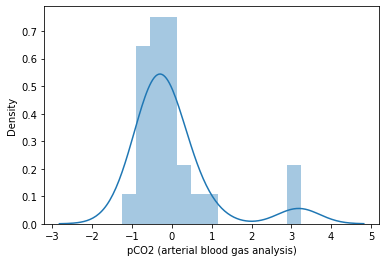

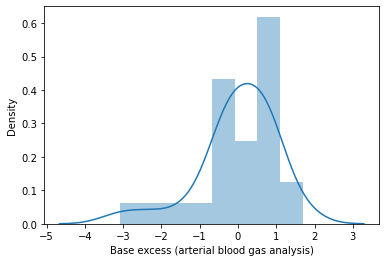

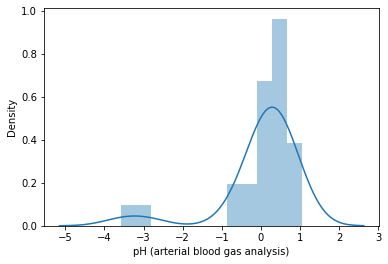

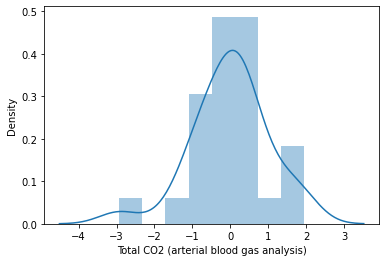

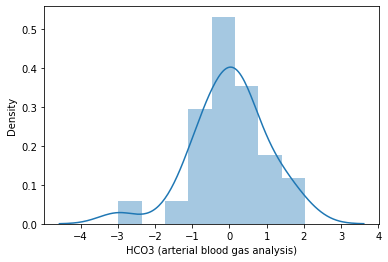

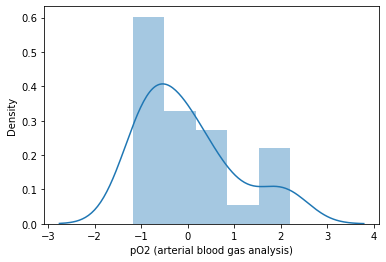

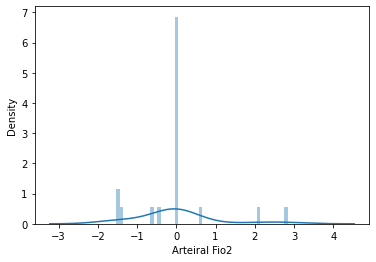

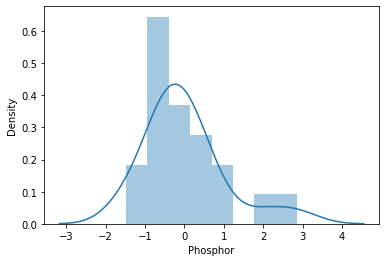

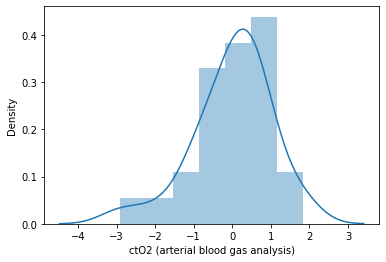

In [4]:
for col in df.select_dtypes('float'):
    plt.figure()
    sns.distplot(df[col])

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Patient age quantile', ylabel='Density'>

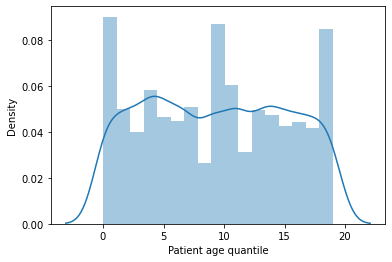

In [5]:
sns.distplot(df['Patient age quantile'])

In [6]:
for col in df.select_dtypes('object'):
    print(f'{col:<30} {df[col].unique()}')

Patient ID                     ['44477f75e8169d2' '126e9dd13932f68' 'a46b4402a0e5696' ...
 '5c57d6037fe266d' 'c20c44766f28291' '2697fdccbfeb7f7']
SARS-Cov-2 exam result         ['negative' 'positive']
Respiratory Syncytial Virus    [nan 'not_detected' 'detected']
Influenza A                    [nan 'not_detected' 'detected']
Influenza B                    [nan 'not_detected' 'detected']
Parainfluenza 1                [nan 'not_detected' 'detected']
CoronavirusNL63                [nan 'not_detected' 'detected']
Rhinovirus/Enterovirus         [nan 'detected' 'not_detected']
Coronavirus HKU1               [nan 'not_detected' 'detected']
Parainfluenza 3                [nan 'not_detected' 'detected']
Chlamydophila pneumoniae       [nan 'not_detected' 'detected']
Adenovirus                     [nan 'not_detected' 'detected']
Parainfluenza 4                [nan 'not_detected' 'detected']
Coronavirus229E                [nan 'not_detected' 'detected']
CoronavirusOC43                [nan 'not_de

<ipython-input-7-5c82b7b87ccc>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


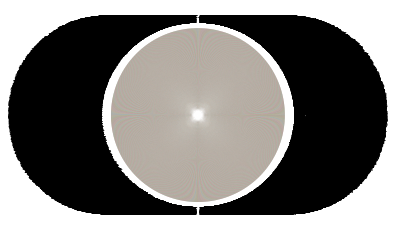

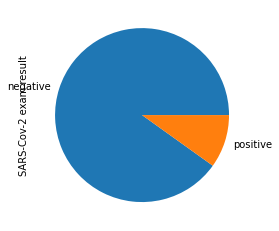

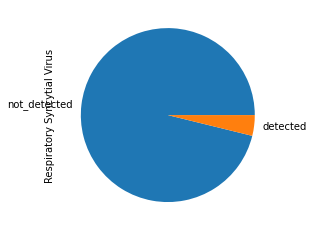

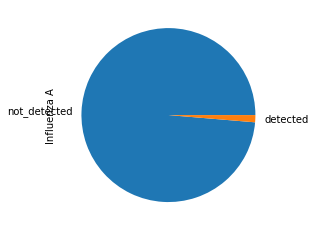

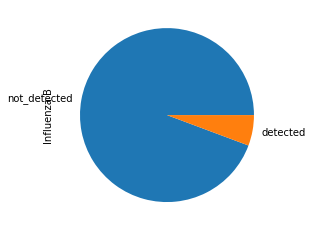

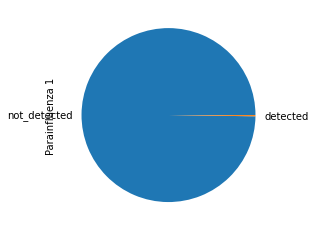

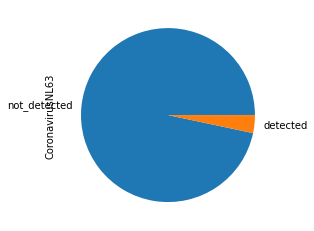

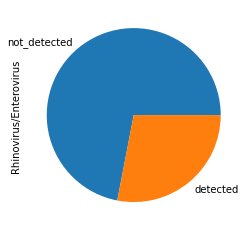

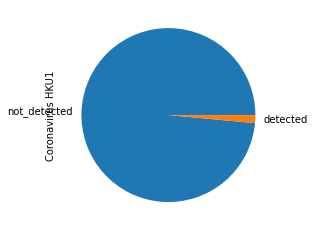

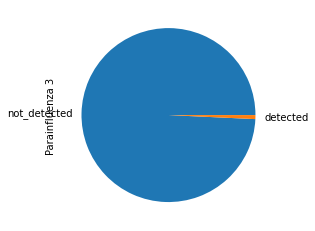

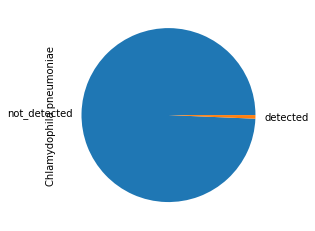

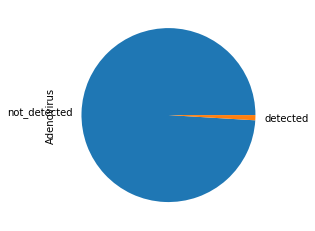

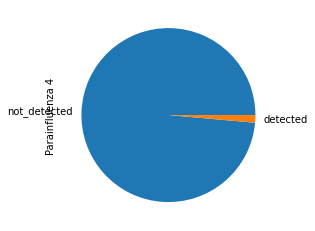

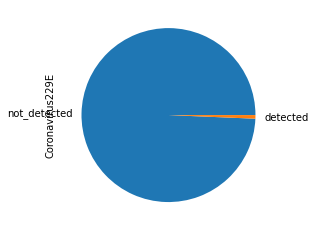

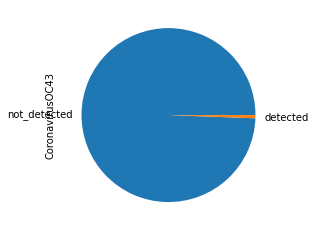

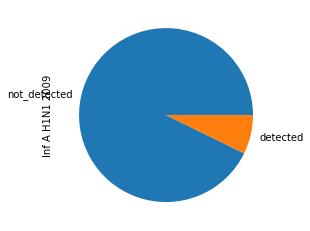

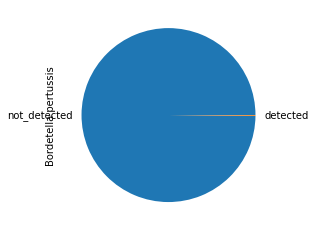

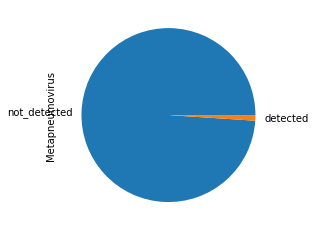

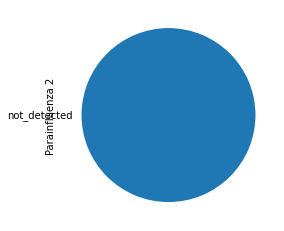

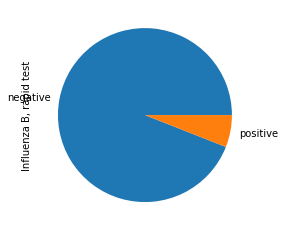

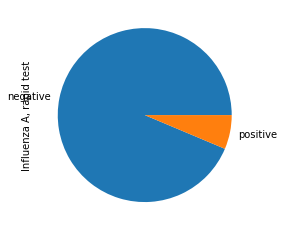

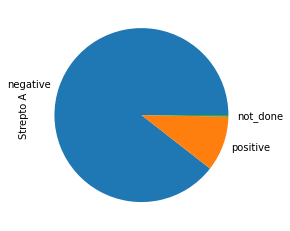

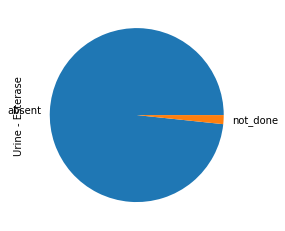

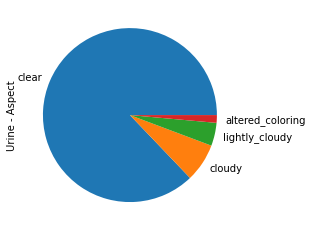

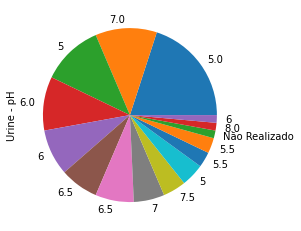

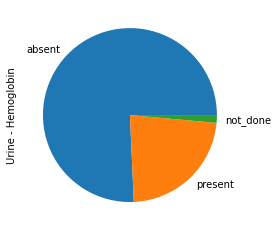

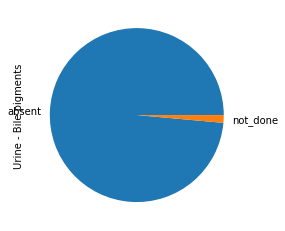

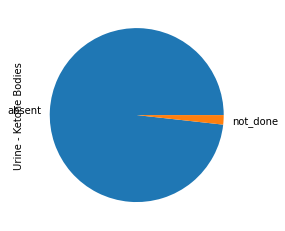

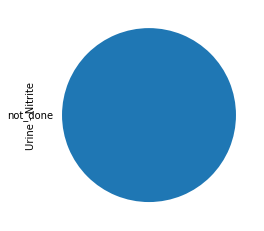

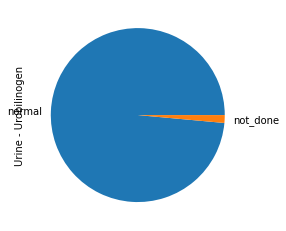

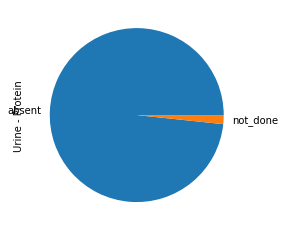

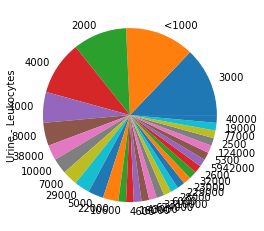

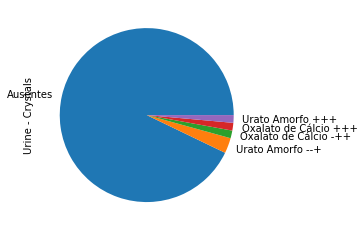

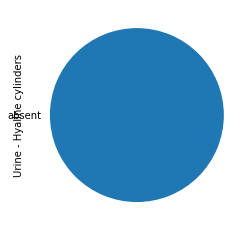

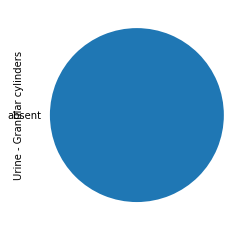

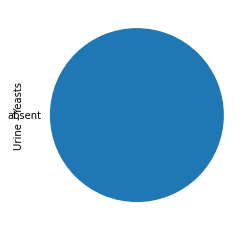

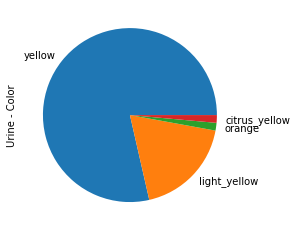

In [7]:
for col in df.select_dtypes('object'):
    plt.figure()
    df[col].value_counts().plot.pie()

In [10]:
df. rename(columns = {'SARS-Cov-2 exam result':'exam result'}, inplace = True)

In [11]:
positive_df = df[df['exam result'] == 'positive']
negative_df = df[df['exam result'] == 'negative']

In [12]:
missing_rate = df.isna().sum()/df.shape[0]

In [13]:
blood_columns = df.columns[(missing_rate < 0.9) & (missing_rate > 0.88)]

In [14]:
viral_columns = df.columns[(missing_rate < 0.88) & (missing_rate > 0.75)]

In [15]:
##Target/Blood

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

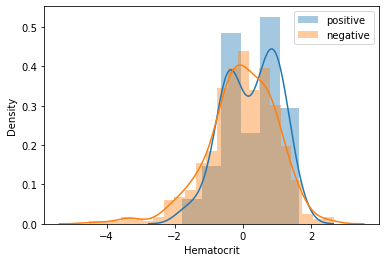

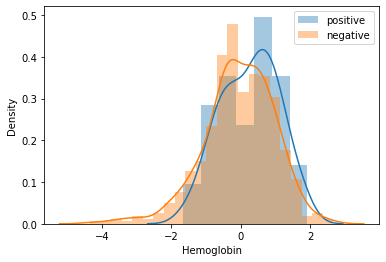

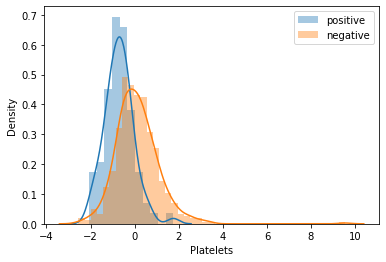

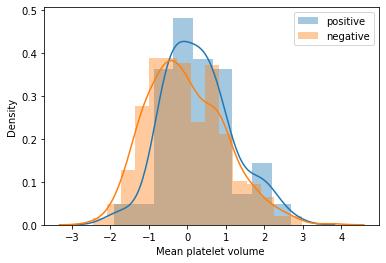

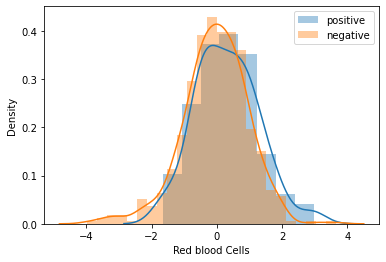

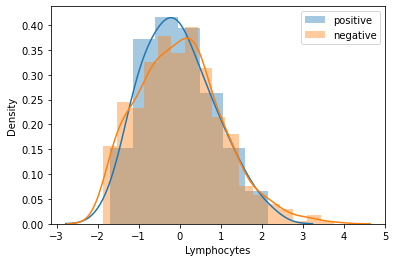

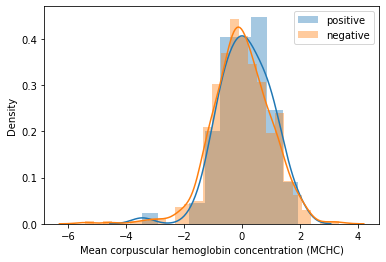

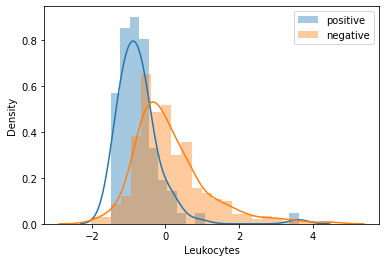

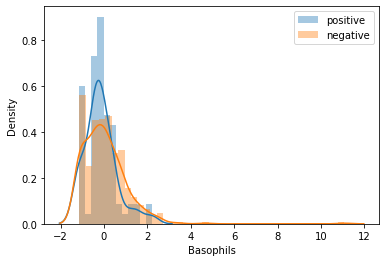

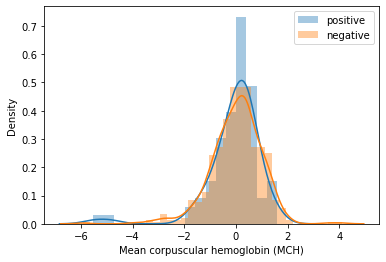

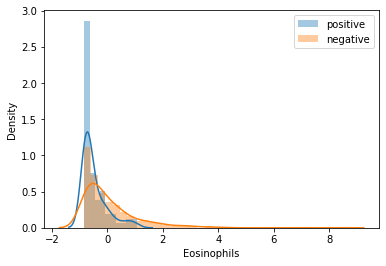

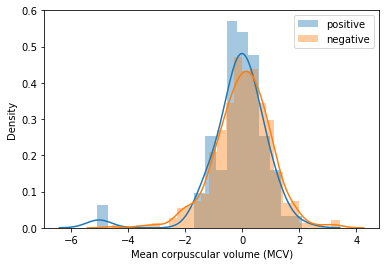

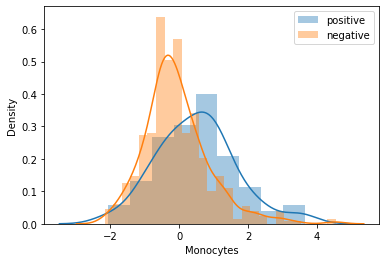

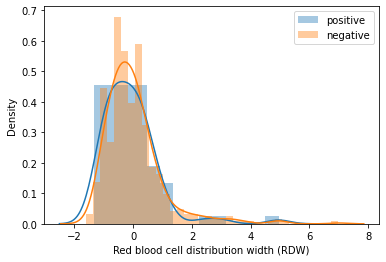

In [16]:
for col in blood_columns:
    plt.figure()
    sns.distplot(positive_df[col], label = 'positive')
    sns.distplot(negative_df[col], label = 'negative')
    plt.legend()

<AxesSubplot:xlabel='Patient age quantile', ylabel='count'>

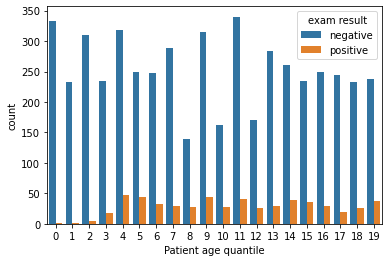

In [17]:
sns.countplot(x = 'Patient age quantile', hue = 'exam result', data = df)

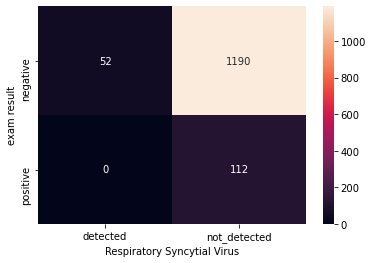

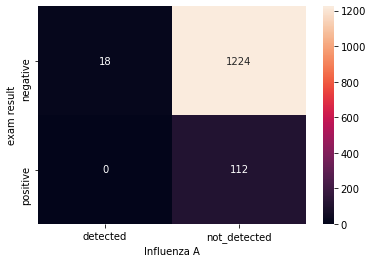

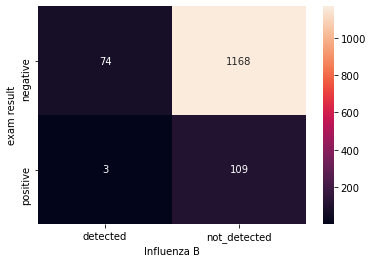

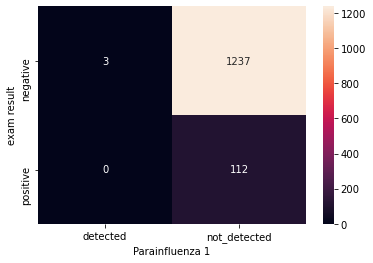

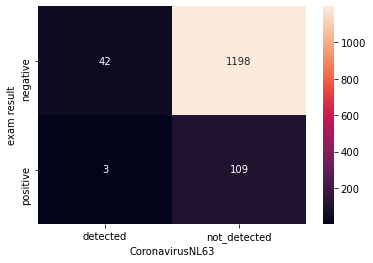

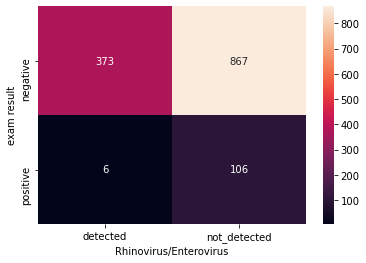

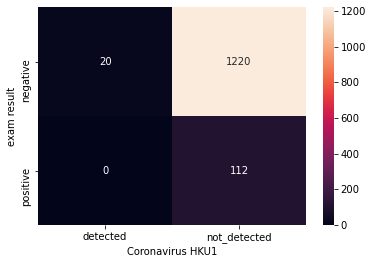

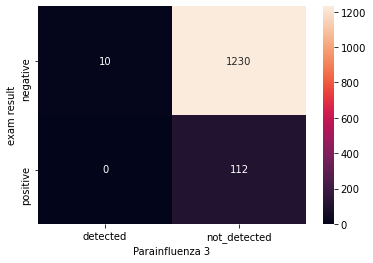

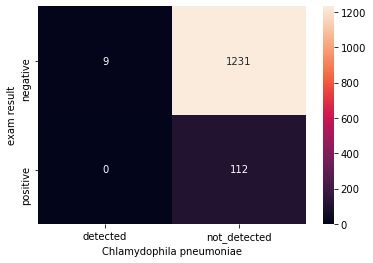

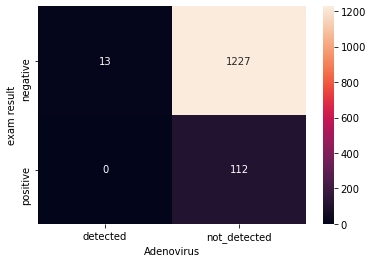

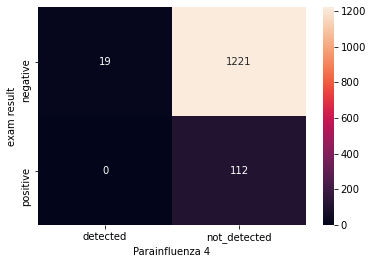

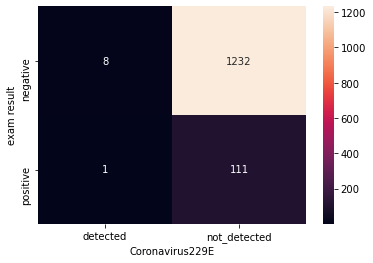

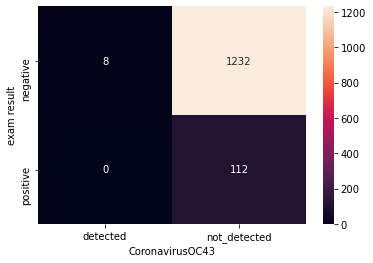

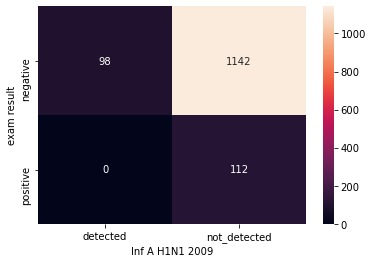

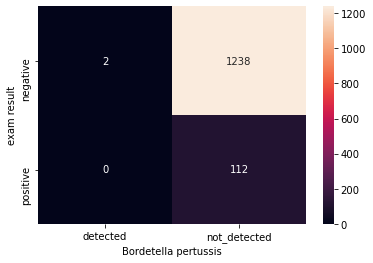

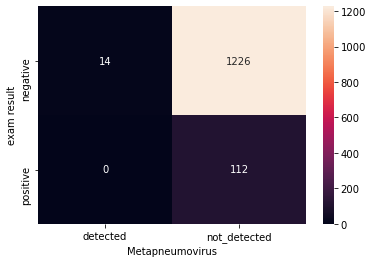

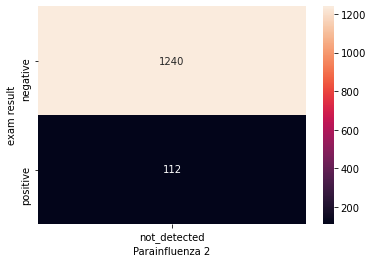

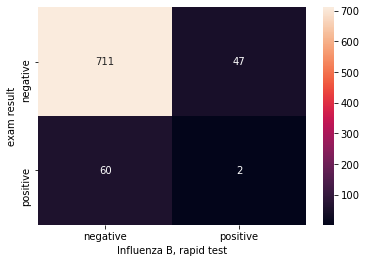

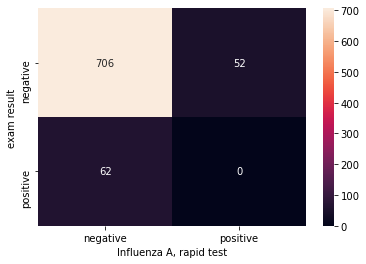

In [18]:
for col in viral_columns:
    plt.figure()
    sns.heatmap(pd.crosstab(df['exam result'], df[col]), annot = True, fmt = 'd')

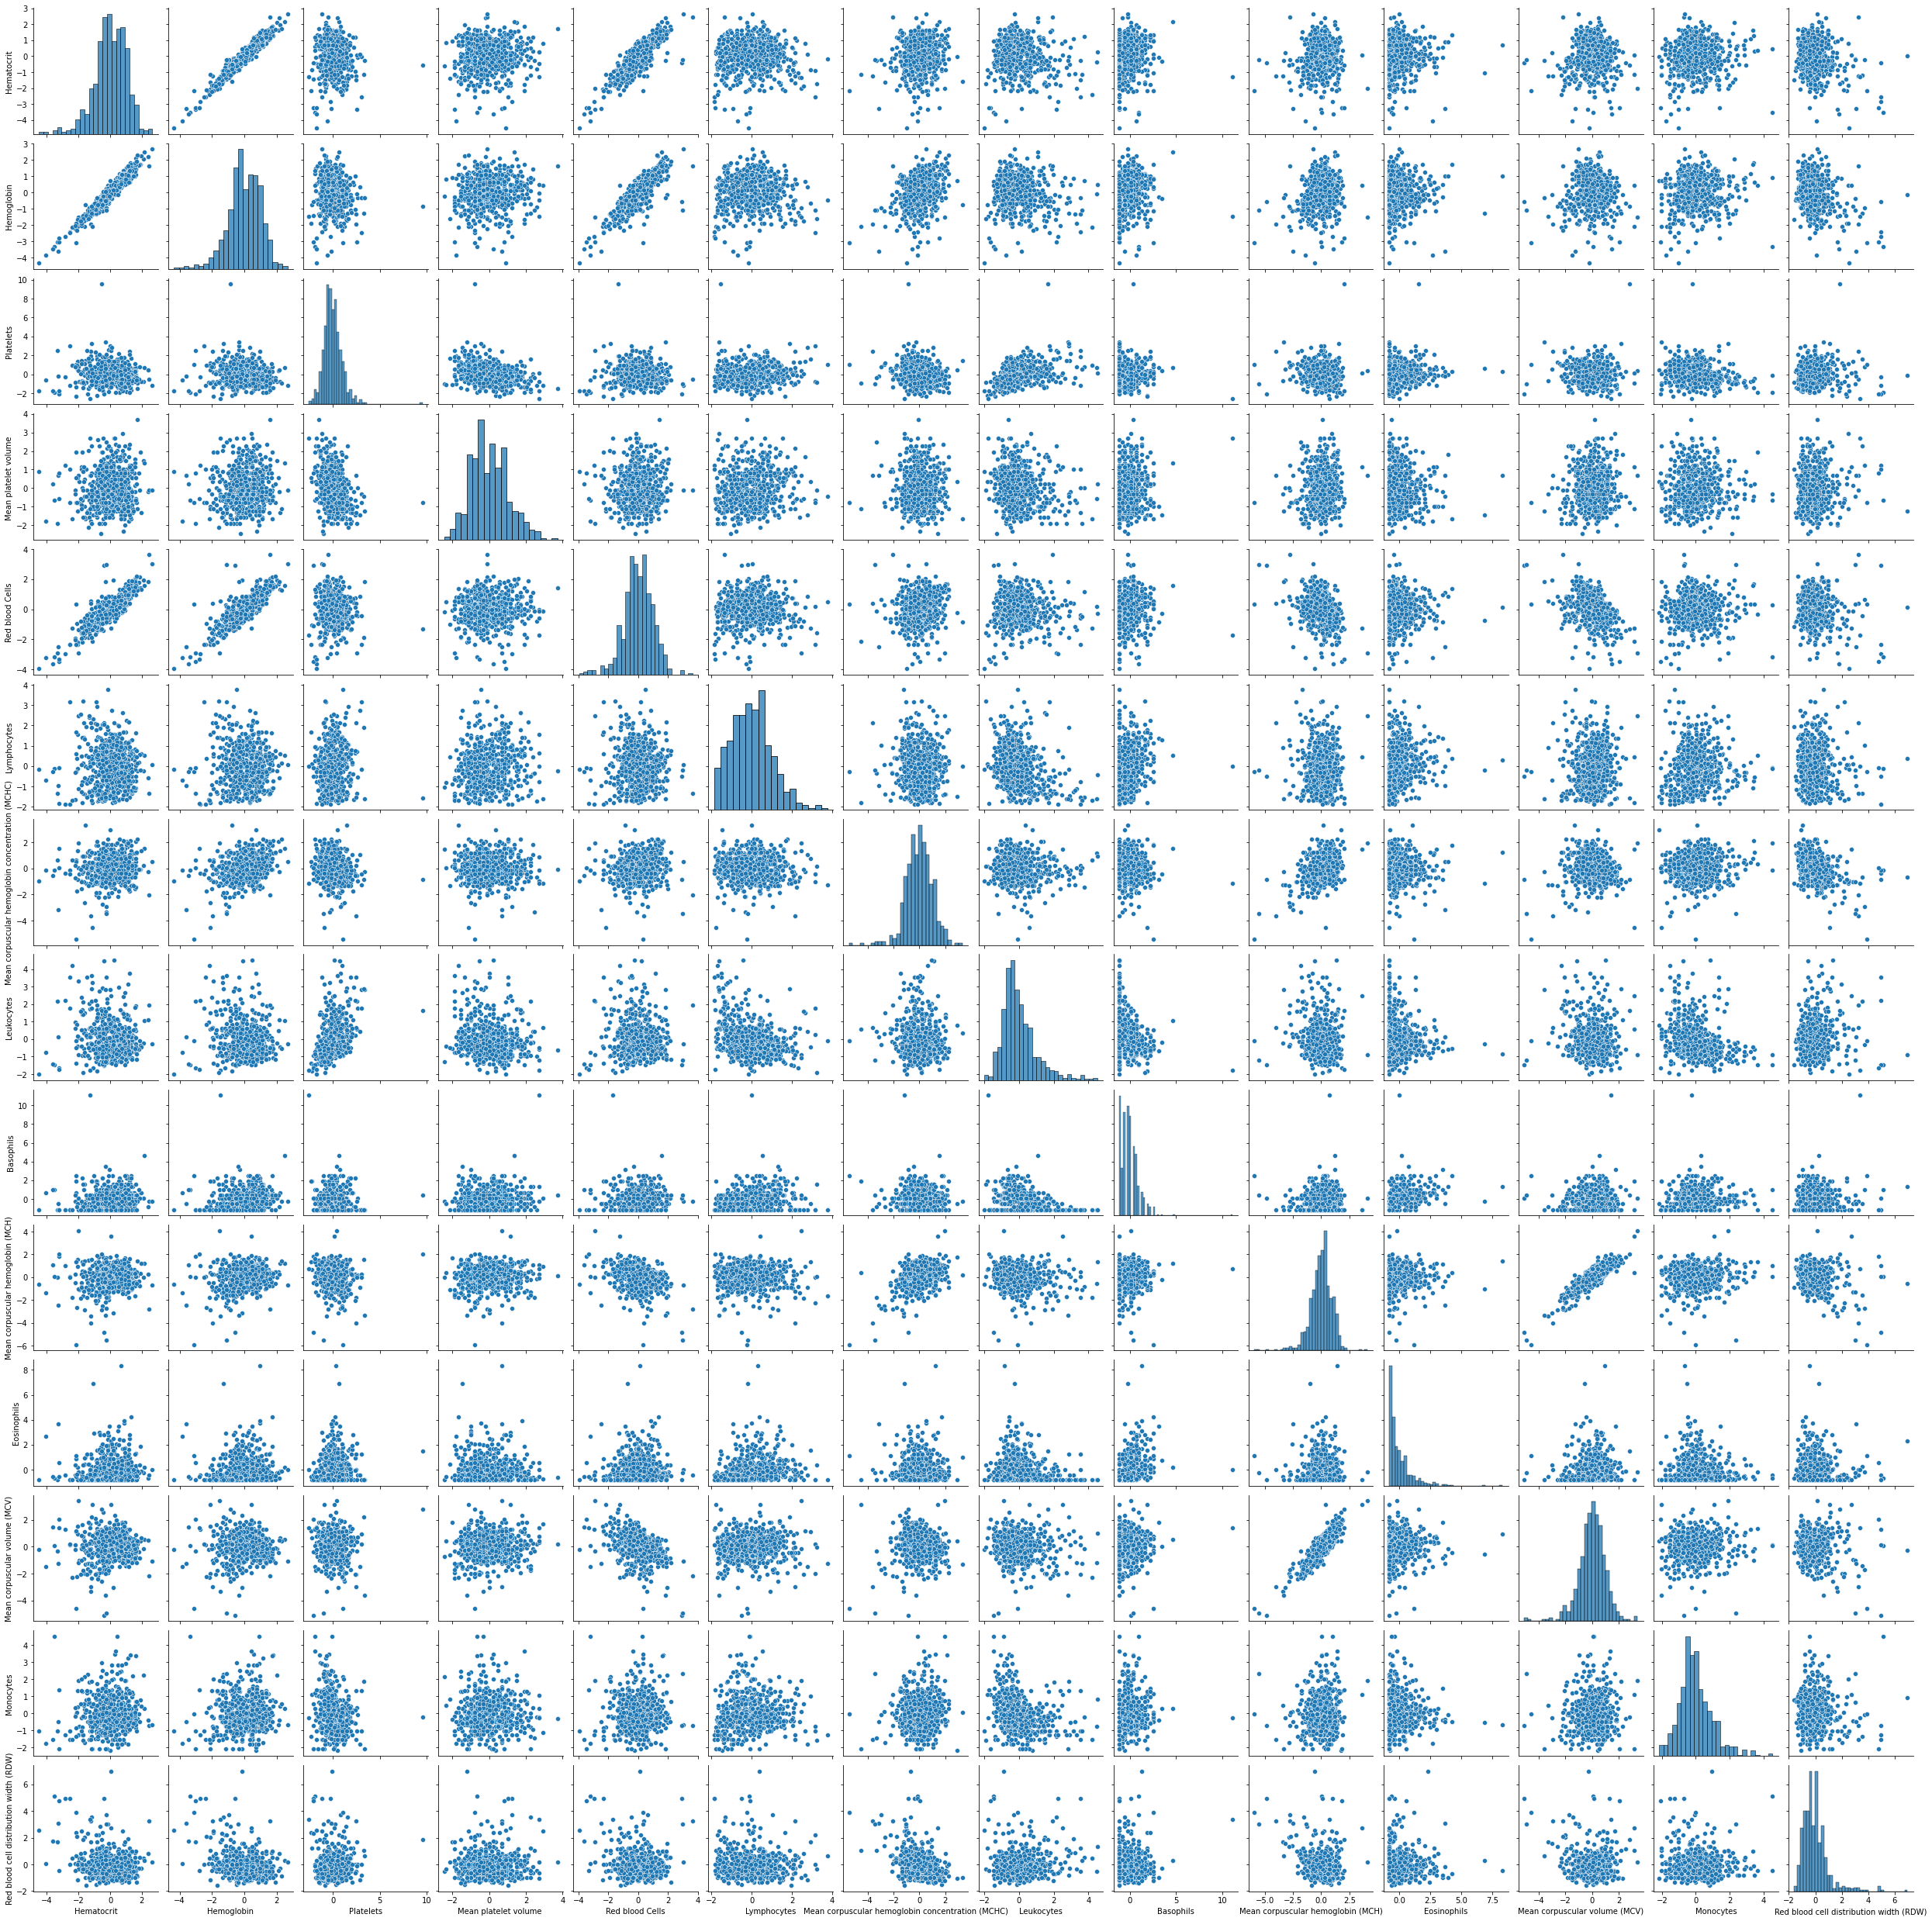

In [63]:
sns.pairplot(df[blood_columns])

<AxesSubplot:>

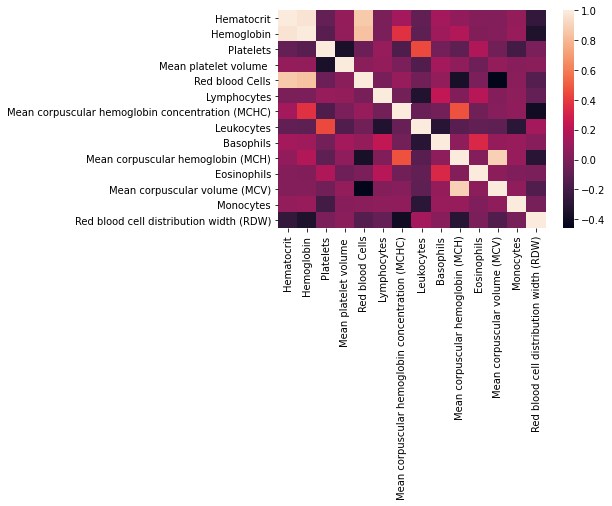

In [19]:
sns.heatmap(df[blood_columns].corr())

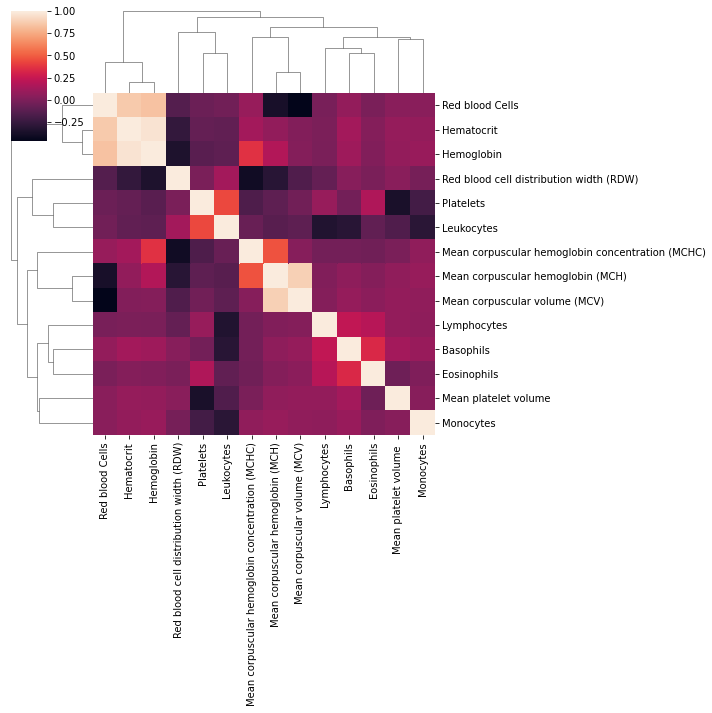

In [20]:
sns.clustermap(df[blood_columns].corr())

<ipython-input-21-73ce321eb08c>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<Figure size 432x288 with 0 Axes>

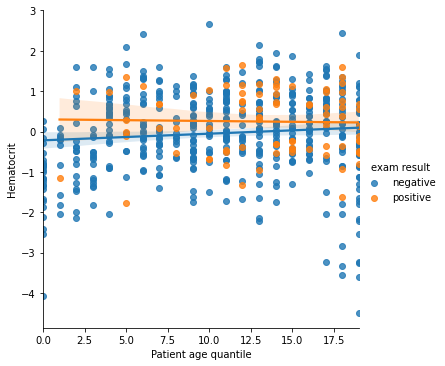

<Figure size 432x288 with 0 Axes>

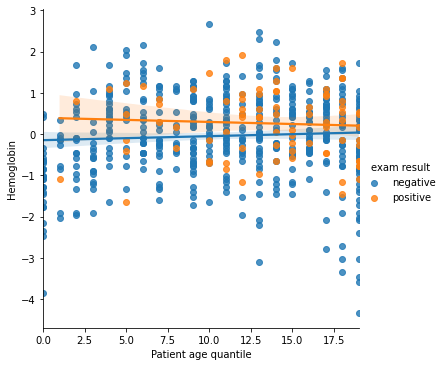

<Figure size 432x288 with 0 Axes>

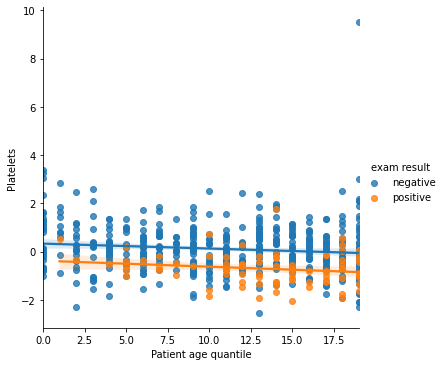

<Figure size 432x288 with 0 Axes>

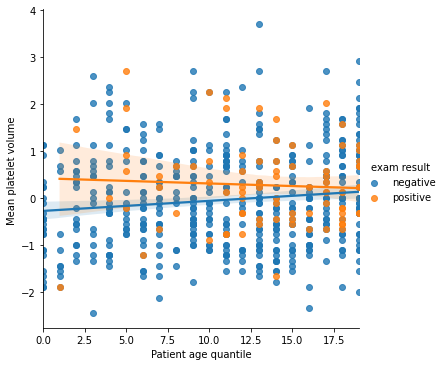

<Figure size 432x288 with 0 Axes>

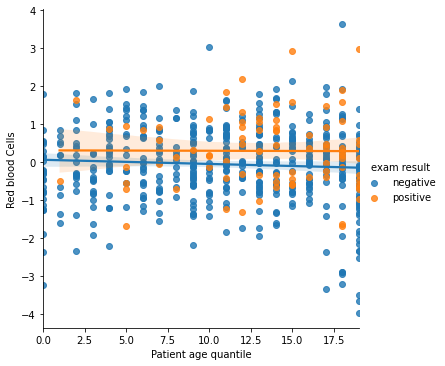

<Figure size 432x288 with 0 Axes>

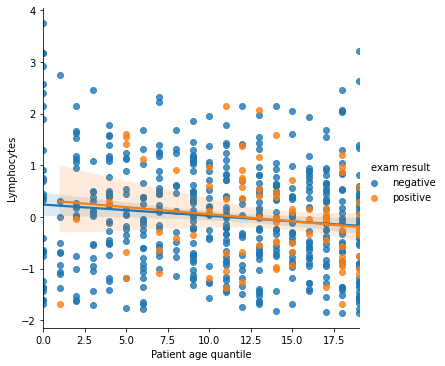

<Figure size 432x288 with 0 Axes>

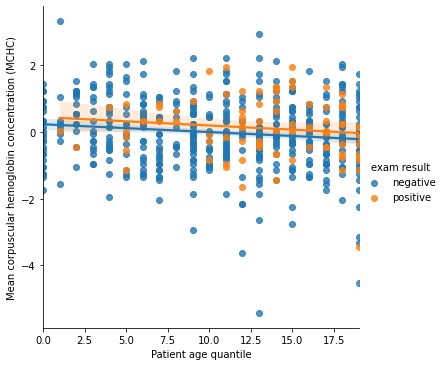

<Figure size 432x288 with 0 Axes>

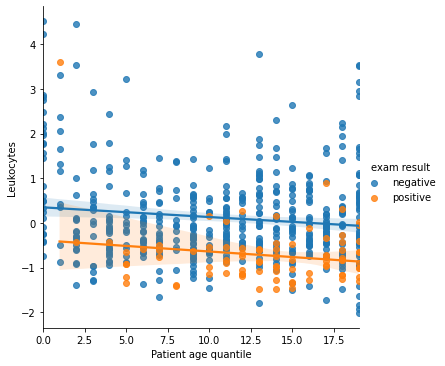

<Figure size 432x288 with 0 Axes>

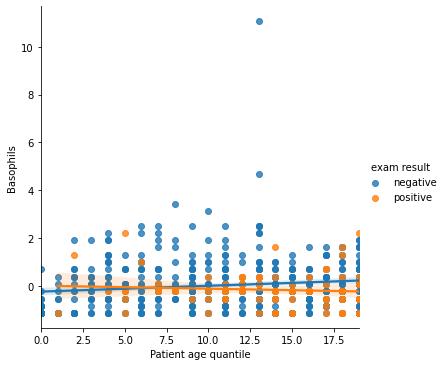

<Figure size 432x288 with 0 Axes>

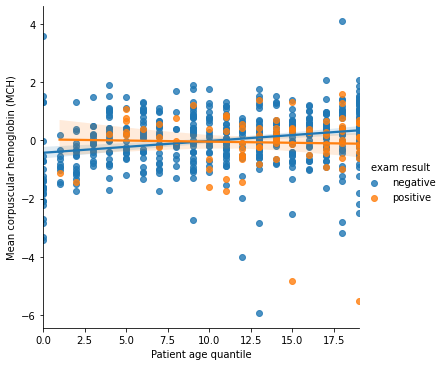

<Figure size 432x288 with 0 Axes>

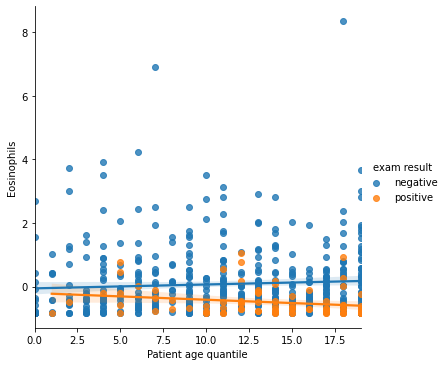

<Figure size 432x288 with 0 Axes>

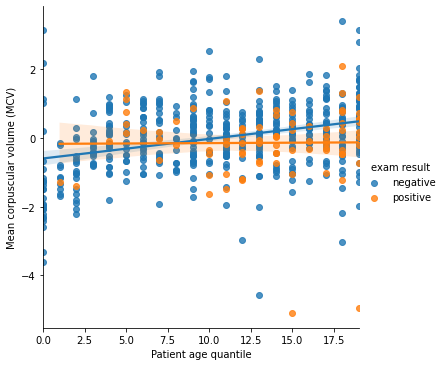

<Figure size 432x288 with 0 Axes>

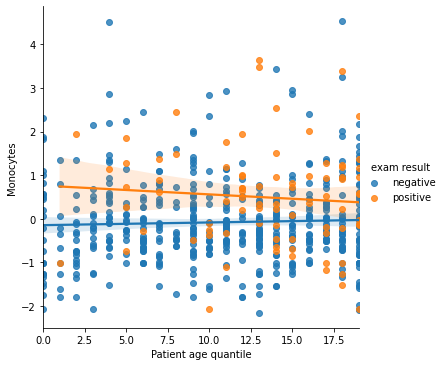

<Figure size 432x288 with 0 Axes>

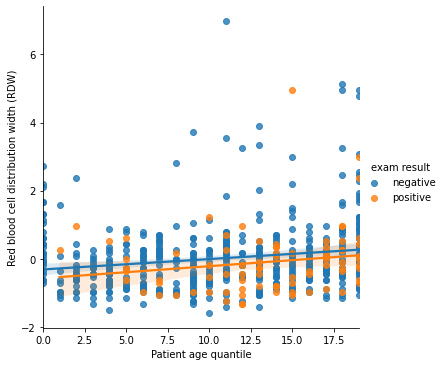

In [21]:
for col in blood_columns:
    plt.figure()
    sns.lmplot(x = 'Patient age quantile', y = col, hue = 'exam result', data = df)

In [22]:
df.corr()['Patient age quantile'].sort_values()

Phosphor                                                -0.511705
Alkaline phosphatase                                    -0.480906
pCO2 (arterial blood gas analysis)                      -0.469049
Lipase dosage                                           -0.357362
Arteiral Fio2                                           -0.334562
Ionized calcium                                         -0.309841
Hb saturation (arterial blood gases)                    -0.223949
Leukocytes                                              -0.166386
Platelets                                               -0.158683
Lactic Dehydrogenase                                    -0.149753
Albumin                                                 -0.137290
Magnesium                                               -0.127646
Lymphocytes                                             -0.125935
Mean corpuscular hemoglobin concentration (MCHC)        -0.124671
Relationship (Patient/Normal)                           -0.122878
Urine - De

In [23]:
pd.crosstab(df['Influenza A'], df['Influenza A, rapid test'])

Influenza A, rapid test  negative  positive
Influenza A                                
detected                        2         4
not_detected                  245        15

In [24]:
pd.crosstab(df['Influenza B'], df['Influenza B, rapid test'])

Influenza B, rapid test  negative  positive
Influenza B                                
detected                       18        11
not_detected                  233         4

In [25]:
df['estmalade'] = np.sum(df[viral_columns[:-2]] == 'detected', axis = 1) >= 1

In [26]:
malade_df = df[df['estmalade'] == True]
non_malade_df = df[df['estmalade'] == False]

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

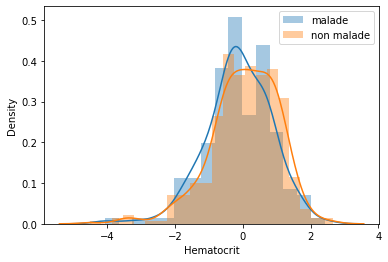

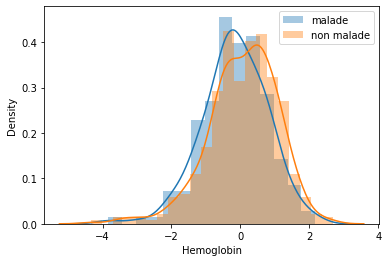

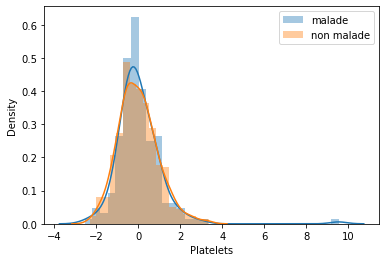

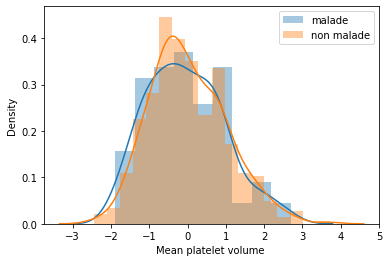

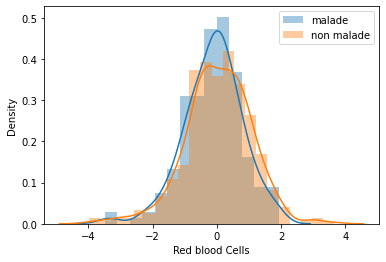

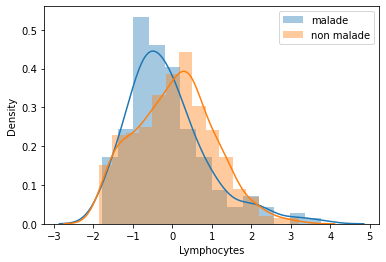

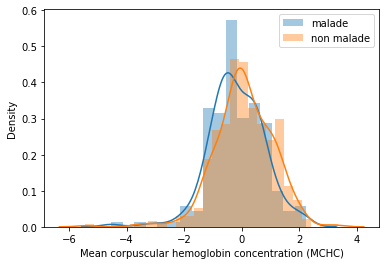

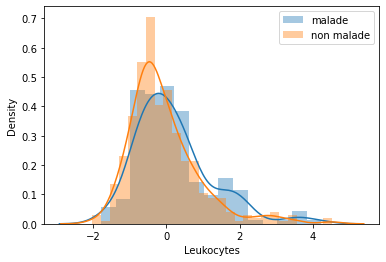

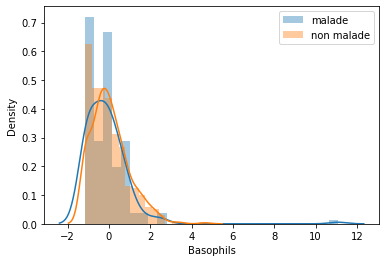

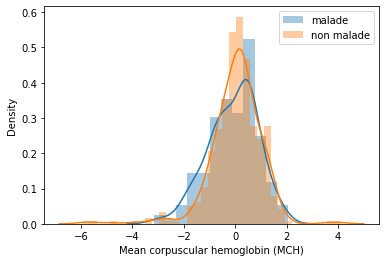

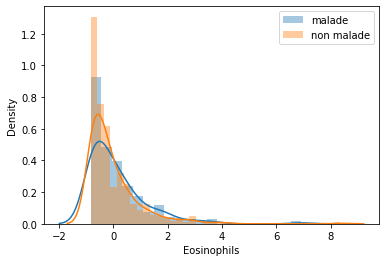

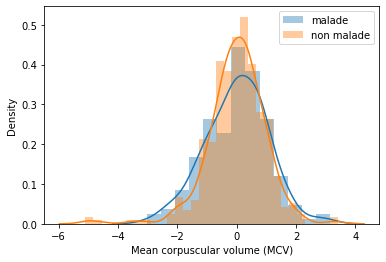

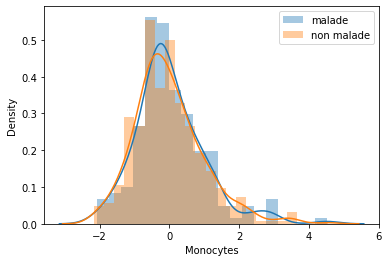

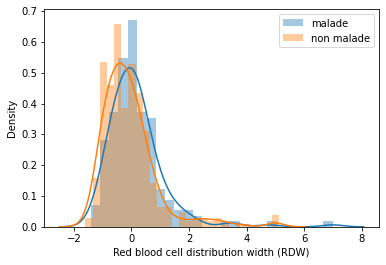

In [27]:
for col in blood_columns:
    plt.figure()
    sns.distplot(malade_df[col], label = 'malade')
    sns.distplot(non_malade_df[col], label = 'non malade')
    plt.legend()

In [28]:
def hospitalisation(df):
    if df['Patient addmited to regular ward (1=yes, 0=no)'] == 1:
        return 'surveillance'
    elif df['Patient addmited to semi-intensive unit (1=yes, 0=no)'] == 1:
        return 'soins semi-intensives'
    elif df['Patient addmited to intensive care unit (1=yes, 0=no)'] == 1:
        return 'soins intensifs'
    else:
        return 'inconnu'

In [29]:
df['statut'] = df.apply(hospitalisation, axis = 1)

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

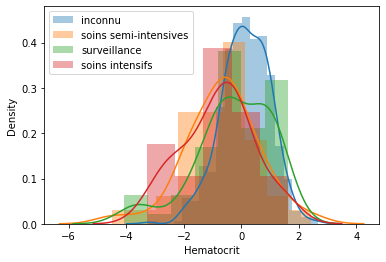

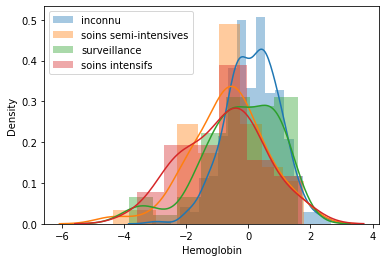

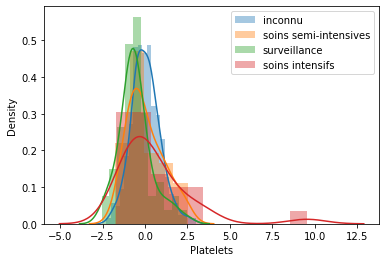

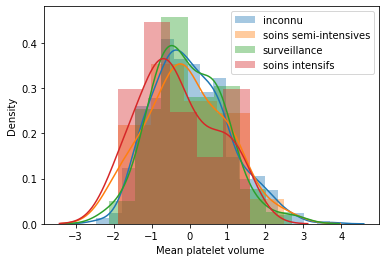

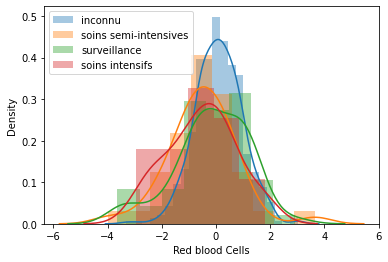

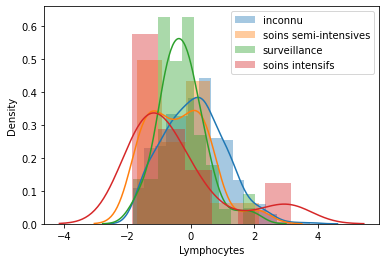

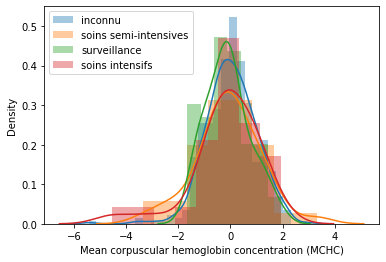

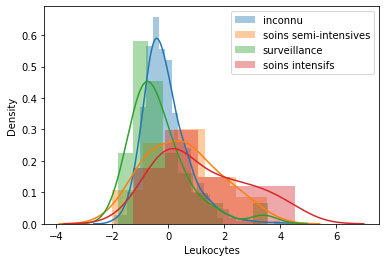

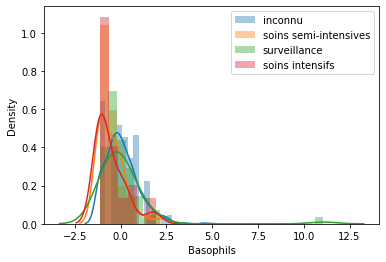

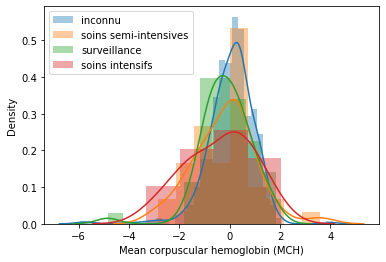

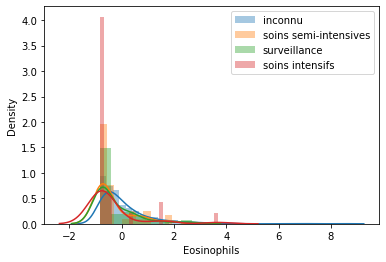

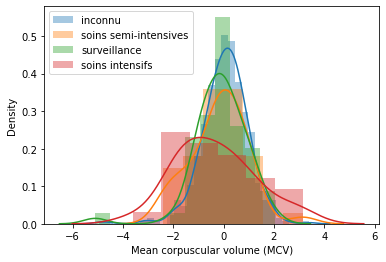

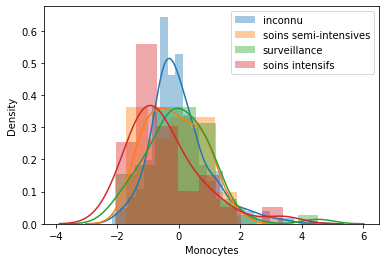

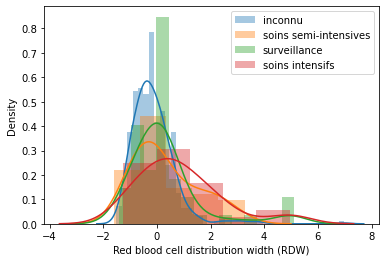

In [30]:
for col in blood_columns:
    plt.figure()
    for cat in df['statut'].unique():
        sns.distplot(df[df['statut'] == cat][col], label = cat)
    plt.legend()    

In [31]:
df1 = df[viral_columns]
df1['covid'] = df['exam result']
df1.dropna()['covid'].value_counts(normalize = True)

<ipython-input-31-487ef8805688>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['covid'] = df['exam result']


negative    0.928302
positive    0.071698
Name: covid, dtype: float64

In [32]:
df2 = df[blood_columns]
df2['covid'] = df['exam result']
df2.dropna()['covid'].value_counts(normalize = True)

<ipython-input-32-40c3df5f36fc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['covid'] = df['exam result']


negative    0.864548
positive    0.135452
Name: covid, dtype: float64

In [33]:
from scipy.stats import ttest_ind

In [34]:
print(positive_df.shape,negative_df.shape)

(558, 111) (5086, 111)


In [35]:
balanced_neg = negative_df.sample(positive_df.shape[0])

In [36]:
def t_test(col):
    alpha = 0.02
    stat, p = ttest_ind(balanced_neg[col].dropna(), positive_df[col].dropna())
    if p < alpha:
        return 'H0 rejetée'
    else:
        return 0

In [37]:
for col in blood_columns:
    print(f'{col:50} {t_test(col)}')

Hematocrit                                         0
Hemoglobin                                         0
Platelets                                          H0 rejetée
Mean platelet volume                               H0 rejetée
Red blood Cells                                    H0 rejetée
Lymphocytes                                        0
Mean corpuscular hemoglobin concentration (MCHC)   0
Leukocytes                                         H0 rejetée
Basophils                                          0
Mean corpuscular hemoglobin (MCH)                  0
Eosinophils                                        H0 rejetée
Mean corpuscular volume (MCV)                      0
Monocytes                                          H0 rejetée
Red blood cell distribution width (RDW)            0


2. Data Preprocessing

In [38]:
missing_rate = df.isna().sum()/df.shape[0]

In [39]:
blood_columns = list(df.columns[(missing_rate<0.9)&(missing_rate>0.88)])
viral_columns = list(df.columns[(missing_rate<0.88)&(missing_rate>0.75)])

In [40]:
df.rename(columns={'SARS-Cov-2 exam result': 'exam result'}, inplace = True)

In [41]:
key_columns = ['Patient age quantile', 'exam result']

In [42]:
df = df[key_columns + blood_columns]# + viral_columns]

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
trainset, testset = train_test_split(df, test_size = 0.2, random_state = 0)

In [45]:
def encodage(df):
    code = {
    'positive' : 1,
    'negative' : 0,
    'detected' : 1,
    'not_detected' : 0
}
    for col in df.select_dtypes('object'):
        df[col] = df[col].map(code)
    return df    

In [46]:
def feature_engineering(df):
    df['est malade'] = df[viral_columns].sum(axis = 1) >= 1
    df = df.drop(viral_columns, axis = 1)
    return df

In [47]:
def imputation(df):
    #df['is na'] = (df['Parainfluenza 3'].isna()) | (df['Leukocytes'].isna())
    #df = df.fillna(-999)
    df = df.dropna(axis = 0)
    return df

In [48]:
def preprocessing(df):
    df = encodage(df)
    df = imputation(df)
    
    x = df.drop('exam result', axis = 1)
    y = df['exam result']
    print(y.value_counts())
    return x, y

In [49]:
x_train, y_train = preprocessing(trainset)

0    422
1     65
Name: exam result, dtype: int64


<ipython-input-45-4a3593fbb876>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].map(code)


In [50]:
x_test, y_test = preprocessing(testset)

0    95
1    16
Name: exam result, dtype: int64


<ipython-input-45-4a3593fbb876>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].map(code)


In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.decomposition import PCA

In [52]:
preprocessor = make_pipeline(PolynomialFeatures(2, include_bias = False), SelectKBest(f_classif, k = 10))

In [53]:
randomForest = make_pipeline(preprocessor, RandomForestClassifier(random_state = 0))
adaBoost = make_pipeline(preprocessor, AdaBoostClassifier(random_state =0))
SVM = make_pipeline(preprocessor, StandardScaler(), SVC(random_state = 0))
KNN = make_pipeline(preprocessor, StandardScaler(), KNeighborsClassifier())

In [54]:
dict_of_models = {'randomForest': randomForest,
                  'adaBoost' : adaBoost,
                  'SVM' : SVM,
                  'KNN' : KNN}

In [58]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

In [59]:
def evaluation(model):
    model.fit(x_train, y_train)
    ypred = model.predict(x_test)
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))
    N, train_score, val_score = learning_curve(model, x_train, y_train, cv = 4, scoring = 'f1', train_sizes = np.linspace(0.1, 1, 10))
    plt.figure(figsize = (12, 8))
    plt.plot(N, train_score.mean(axis = 1), label = 'train score')
    plt.plot(N, val_score.mean(axis = 1), label = 'validation score')
    

randomForest
[[89  6]
 [10  6]]
              precision    recall  f1-score   support

           0       0.90      0.94      0.92        95
           1       0.50      0.38      0.43        16

    accuracy                           0.86       111
   macro avg       0.70      0.66      0.67       111
weighted avg       0.84      0.86      0.85       111

adaBoost
[[87  8]
 [ 9  7]]
              precision    recall  f1-score   support

           0       0.91      0.92      0.91        95
           1       0.47      0.44      0.45        16

    accuracy                           0.85       111
   macro avg       0.69      0.68      0.68       111
weighted avg       0.84      0.85      0.84       111

SVM
[[92  3]
 [11  5]]
              precision    recall  f1-score   support

           0       0.89      0.97      0.93        95
           1       0.62      0.31      0.42        16

    accuracy                           0.87       111
   macro avg       0.76      0.64      0.67  

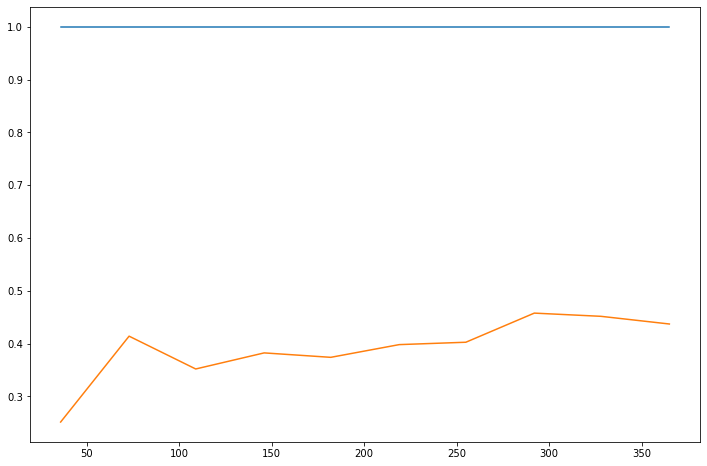

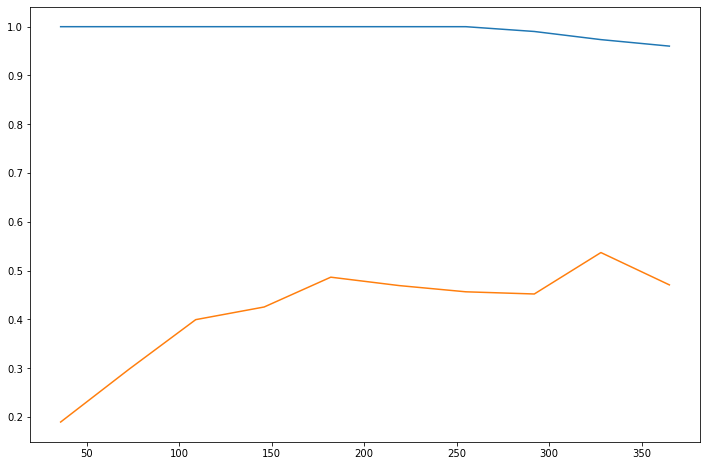

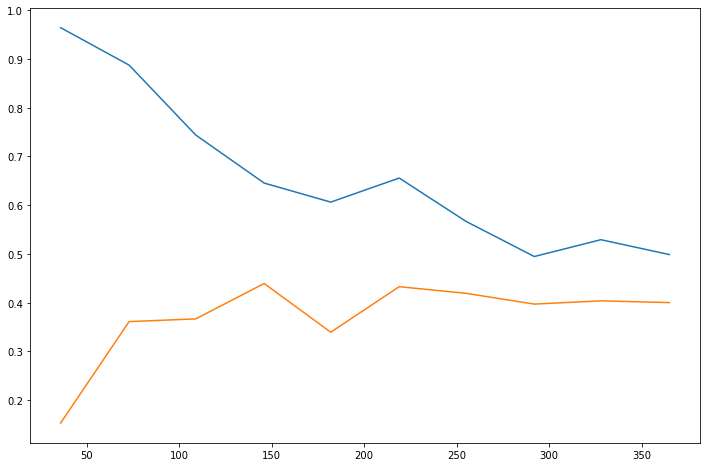

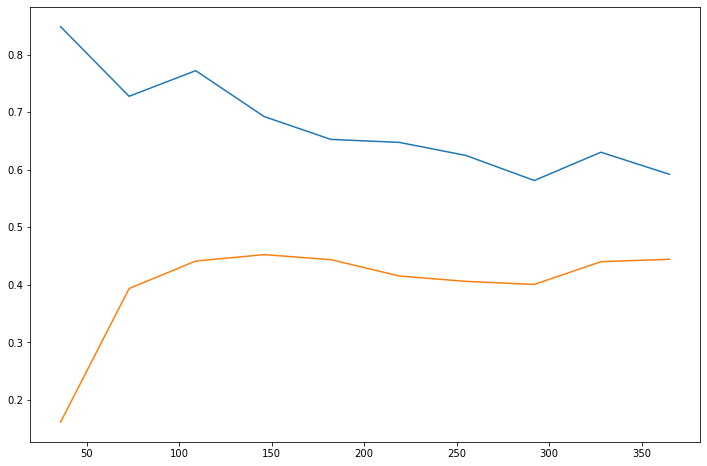

In [60]:
for name, model in dict_of_models.items():
    print(name)
    evaluation(model)

In [61]:
SVM

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('polynomialfeatures',
                                  PolynomialFeatures(include_bias=False)),
                                 ('selectkbest', SelectKBest())])),
                ('standardscaler', StandardScaler()),
                ('svc', SVC(random_state=0))])

In [62]:
hyper_params = {'svc__gamma':[1e-3, 1e-4],
                'svc__C':[1, 10, 100, 1000],
                'pipeline__polynomialfeatures__degree' : [2, 3, 4],
                'pipeline__selectkbest__k' : range(40, 60)
               }

In [63]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [64]:
grid = RandomizedSearchCV(SVM, hyper_params, scoring = 'recall', cv = 4, n_iter = 40)
grid.fit(x_train, y_train)
print(grid.best_params_)
y_pred = grid.predict(x_test)
print(classification_report(y_test, y_pred))

{'svc__gamma': 0.001, 'svc__C': 1000, 'pipeline__selectkbest__k': 40, 'pipeline__polynomialfeatures__degree': 3}
              precision    recall  f1-score   support

           0       0.90      0.94      0.92        95
           1       0.50      0.38      0.43        16

    accuracy                           0.86       111
   macro avg       0.70      0.66      0.67       111
weighted avg       0.84      0.86      0.85       111



[[89  6]
 [10  6]]
              precision    recall  f1-score   support

           0       0.90      0.94      0.92        95
           1       0.50      0.38      0.43        16

    accuracy                           0.86       111
   macro avg       0.70      0.66      0.67       111
weighted avg       0.84      0.86      0.85       111



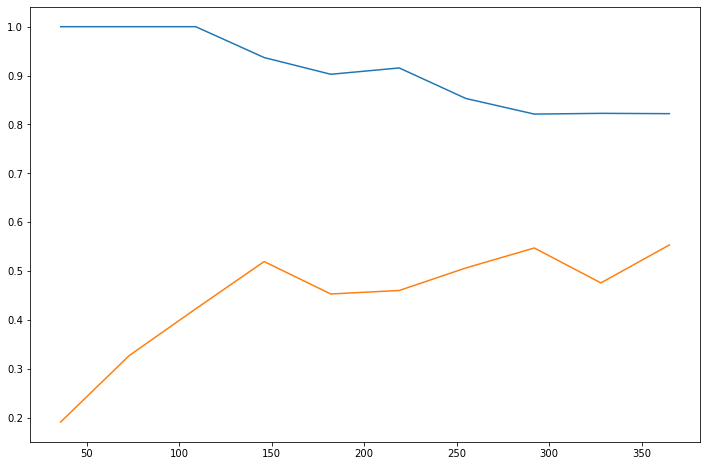

In [65]:
evaluation(grid.best_estimator_)

In [66]:
from sklearn.metrics import precision_recall_curve

In [67]:
precision, recall, threshold = precision_recall_curve(y_test, grid.best_estimator_.decision_function(x_test))

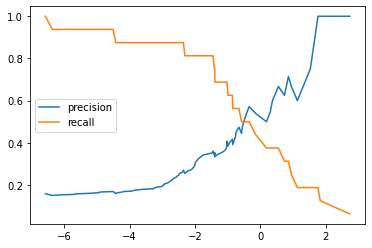

In [68]:
plt.plot(threshold, precision[:-1], label = 'precision')
plt.plot(threshold, recall[:-1], label = 'recall')
plt.legend()

In [69]:
def model_final(model, x, threshold = 0):
    return model.decision_function(x) > threshold

In [70]:
y_pred = model_final(grid.best_estimator_, x_test, threshold = -1)

In [71]:
from sklearn.metrics import recall_score

In [72]:
f1_score(y_test, y_pred)

0.4761904761904762

In [73]:
recall_score(y_test, y_pred)

0.625